<a href="https://colab.research.google.com/github/mkadamgithubrit/machine-learning-task-3-simple-linear-regression./blob/main/machine_learning_task_3_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Salary_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.drop(columns = ["Unnamed: 0"], axis=1, inplace=True)

In [5]:
df.shape

(30, 2)

In [6]:
df.isnull().sum()

,0
YearsExperience,0
Salary,0


In [7]:
# Dropping rows with any null values
df = df.dropna()

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
std = StandardScaler()

In [10]:
# Fit and transform the data
df = pd.DataFrame(std.fit_transform(df), columns=df.columns)

In [11]:
df.head(3)

,YearsExperience,Salary
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919


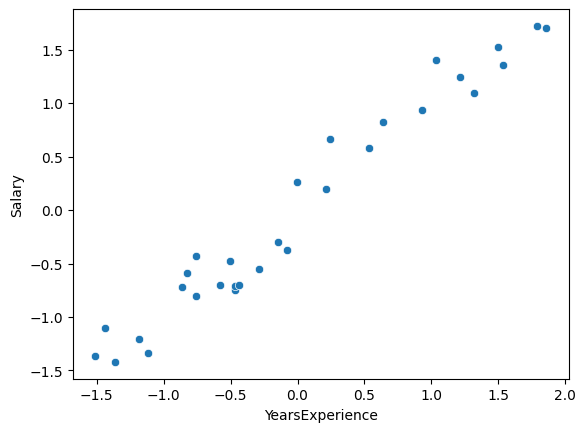

In [12]:
sns.scatterplot(x = 'YearsExperience', y = 'Salary', data = df)
plt.show()

In [13]:
x = df[['YearsExperience']]
y = df['Salary']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state= 75)

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [16]:
lr.fit(x_train,y_train)

LinearRegression()

In [17]:
lr.score(x_test, y_test)*100

96.52242905568413

In [18]:
y_prd = lr.predict(x)

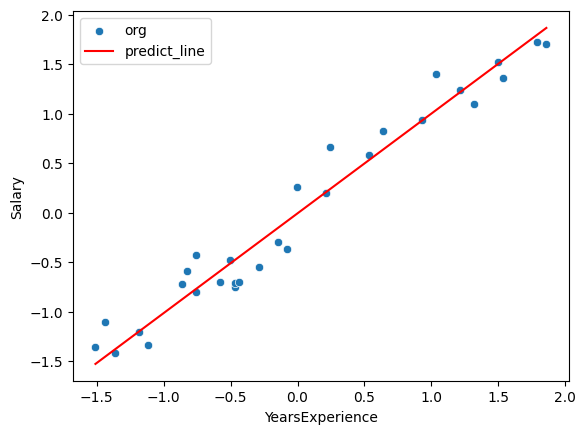

In [19]:
sns.scatterplot(x = 'YearsExperience', y = 'Salary', data = df)
plt.plot(df['YearsExperience'],y_prd, c='red' )
plt.legend(['org', 'predict_line'])
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [26]:
# Making predictions
y_pred = lr.predict(x_test)

# Calculating performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing performance metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R² Score: {r2:.4f}')

# Interpreting the results
print(f"\nThe Mean Squared Error (MSE) is {mse:.4f}, indicating that the model's predictions are fairly accurate with small squared differences.")
print(f"The Mean Absolute Error (MAE) is {mae:.4f}, meaning that the model, on average, is off by around {mae:.4f} in its predictions.")

# Summary of the model's performance based on R² score
if r2 > 0.80:
    print("\nThe R² score indicates that the model explains a large portion of the variance, making it a strong performer.")
elif 0.50 < r2 <= 0.80:
    print("\nThe R² score suggests moderate performance. The model is decent but could be improved with more features or tuning.")
else:
    print("\nThe R² score shows low explanatory power, and the model might benefit from additional features or different algorithms.")

# Overall conclusion
print("\nOverall, the Linear Regression model provides a reasonable fit for predicting salary based on years of experience. It shows good potential, but there may be room for fine-tuning and further enhancements.")

Mean Squared Error (MSE): 0.0338
Mean Absolute Error (MAE): 0.1416
R² Score: 0.9652

The Mean Squared Error (MSE) is 0.0338, indicating that the model's predictions are fairly accurate with small squared differences.
The Mean Absolute Error (MAE) is 0.1416, meaning that the model, on average, is off by around 0.1416 in its predictions.

The R² score indicates that the model explains a large portion of the variance, making it a strong performer.

Overall, the Linear Regression model provides a reasonable fit for predicting salary based on years of experience. It shows good potential, but there may be room for fine-tuning and further enhancements.
